In [1]:
import matplotlib.pyplot as plt

In [2]:
import cartopy.crs as ccrs

In [3]:
import xarray as xr

In [4]:
import cartopy

In [5]:
import numpy as np

In [6]:
import cf_xarray as cf

In [7]:
cd /g/data/tm70/as2285/om3-scripts/grid_generation/

/g/data/tm70/as2285/om3-scripts/grid_generation


In [8]:
ls

01deg/     grid.nc            ocean_model_grid_generator/
025deg/    kmt.nc             pbs_make_cice_grids.sh
1deg/      make_cice_grid.py  pbs_make_cice_grids.sh.o111440622
esmgrids/  ocean_hgrid.nc     pbs_make_cice_grids.sh.o111782873
ezhil/     ocean_mask.nc      README.md


In [9]:
ll

total 1902820
drwxrwSr-x 2 as2285       4096 Mar 26 15:09 01deg/
drwxr-sr-x 2 as2285       4096 Mar 26 15:07 025deg/
drwxr-sr-x 2 as2285       4096 Mar 26 15:07 1deg/
drwxrwSr-x 5 as2285       4096 Mar 22 09:28 esmgrids/
drwxrwSr-x 5 as2285       4096 Mar 20 09:48 ezhil/
-rw-r--r-- 1 as2285  123830930 Mar 28 15:24 grid.nc
-rw-r--r-- 1 as2285     339192 Mar 28 15:24 kmt.nc
-rw-rw-r-- 1 as2285       2053 Mar 22 10:12 make_cice_grid.py
-rw-r--r-- 1 as2285 1814800120 Mar 28 15:11 ocean_hgrid.nc
-rw-r--r-- 1 as2285    9456144 Mar 28 15:11 ocean_mask.nc
drwxrwSr-x 6 as2285       4096 Mar 27 16:00 ocean_model_grid_generator/
-rw-rw-r-- 1 as2285        903 Mar 26 15:19 pbs_make_cice_grids.sh
-rw-r--r-- 1 as2285        923 Mar 22 10:00 pbs_make_cice_grids.sh.o111440622
-rw-r--r-- 1 as2285       1073 Mar 26 15:09 pbs_make_cice_grids.sh.o111782873
-rw-r--r-- 1 as2285        443 Mar 20 12:13 README.md


Make a 8 deg global tripolar grid in the mom supergrid format

In [10]:
! python3 ocean_model_grid_generator/ocean_grid_generator.py -r 1 --ensure_nj_even --no_south_cap

Requesting Mercator grid with phi range: phi_s,phi_n= -66.85954725 64.05895973
   y*= [-182  168] nj= 351
  *Equator may not be a u-point!
  *Fixing this by shifting the bounds!
   y*= [-183  167] nj= 351
   Generating Mercator grid with phi range: phi_s,phi_n= [-67.10393529  63.78421168]
   Equator is at j= 183
   Final Mercator grid range= -67.10393529056725 63.78421168191804
   number of js= 351
   CHECK_metrics: % errors in (area, lat arc, lon arc) (-2.695490087136176e-14, 1.2798080388556905e-14, -2.3919676836003128e-14)
Generating bipolar grid bounded at latitude  63.78421168191804
   number of js= 121
   Calculating bipolar cap metrics via quadrature ...
/g/data/tm70/as2285/om3-scripts/grid_generation/ocean_model_grid_generator/ocean_grid_generator.py:47: RuntimeWarning: invalid value encountered in multiply
  rden = 1.0 / (1.0 + alpha2 * beta2_inv)
/g/data/tm70/as2285/om3-scripts/grid_generation/ocean_model_grid_generator/ocean_grid_generator.py:82: RuntimeWarning: invalid value

In [11]:
mom_grid = xr.open_dataset('ocean_hgrid.nc')

In [12]:
mom_grid

<xarray.Dataset> Size: 18MB
Dimensions:   (nyp: 525, nxp: 721, ny: 524, nx: 720)
Dimensions without coordinates: nyp, nxp, ny, nx
Data variables:
    tile      |S255 255B ...
    y         (nyp, nxp) float64 3MB ...
    x         (nyp, nxp) float64 3MB ...
    dy        (ny, nxp) float64 3MB ...
    dx        (nyp, nx) float64 3MB ...
    area      (ny, nx) float64 3MB ...
    angle_dx  (nyp, nxp) float64 3MB ...
Attributes:
    history:      This grid file was generated via command ocean_model_grid_g...
    description:  This is an orthogonal coordinate grid for the Earth with a ...
    source:       ocean_model_grid_generator/ocean_grid_generator.py had git ...

In [13]:
mom_grid.x.max()

<xarray.DataArray 'x' ()> Size: 8B
array(60.)

An ocean mask with no masking

In [14]:
ocean_mask = xr.Dataset()

In [15]:
ocean_mask['mask']=((mom_grid.area.coarsen(ny=2).sum().coarsen(nx=2).sum())!=0)

In [16]:
ocean_mask.to_netcdf('ocean_mask.nc')

Looks like a grid

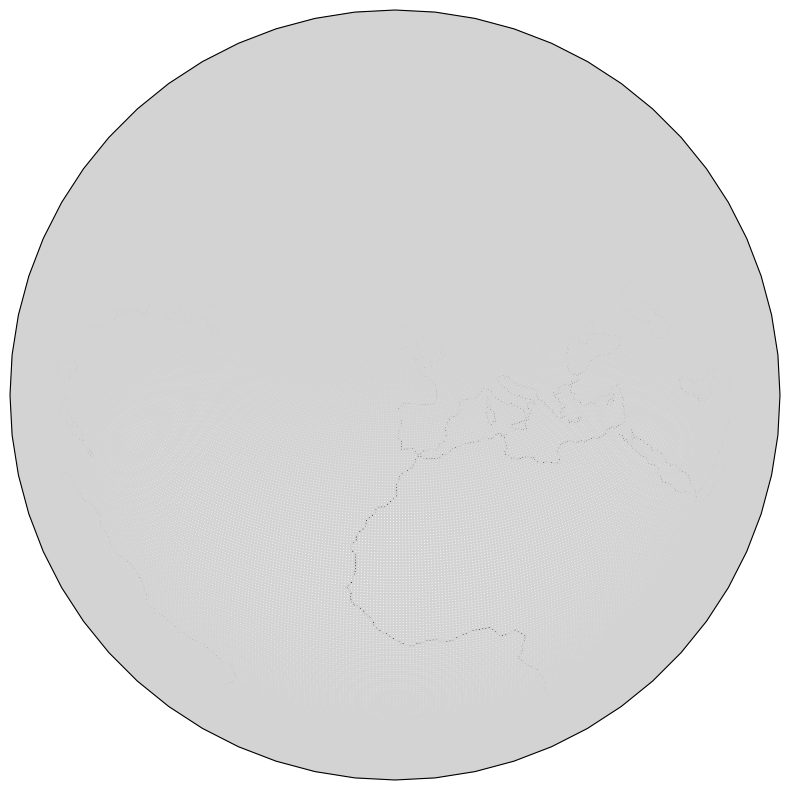

In [17]:
crs = ccrs.Orthographic(-10, 45)

plt.figure(figsize=(10,10))
ax = plt.axes(projection=crs)

ax.set_global()
# ax.gridlines()
ax.coastlines()

_ = plt.plot(mom_grid.x, mom_grid.y, transform=ccrs.PlateCarree(), color='lightgrey')
_ = plt.plot(mom_grid.x.transpose(), mom_grid.y.transpose(), transform=ccrs.PlateCarree(),color='lightgrey')

### Make the cice grid

In [18]:
rm 'grid.nc' 'kmt.nc'

In [19]:
! python3 make_cice_grid.py ocean_hgrid.nc ocean_mask.nc

In [20]:
cice_grid = xr.open_dataset('grid.nc')

In [21]:
cice_grid

<xarray.Dataset> Size: 8MB
Dimensions:  (ny: 262, nx: 360)
Coordinates:
    ulat     (ny, nx) float64 755kB ...
    ulon     (ny, nx) float64 755kB ...
    tlat     (ny, nx) float64 755kB ...
    tlon     (ny, nx) float64 755kB ...
Dimensions without coordinates: ny, nx
Data variables:
    htn      (ny, nx) float64 755kB ...
    hte      (ny, nx) float64 755kB ...
    angle    (ny, nx) float64 755kB ...
    angleT   (ny, nx) float64 755kB ...
    tarea    (ny, nx) float64 755kB ...
    uarea    (ny, nx) float64 755kB ...
    crs      |S1 1B ...
Attributes:
    timeGenerated:    2024-03-28 15:58:50.944740
    created_by:       as2285
    history:          Created using commit bbc2a563d06dc7b4eb3c6e6d0fd7d3f5a9...
    inputfile:        ocean_hgrid.nc
    inputfile_md5:    99a1566dd4e5c9c126b536dfbda09b34
    history_command:  python make_CICE_grid.py ocean_hgrid.nc ocean_mask.nc
    Conventions:      CF-1.6

Visual inspection

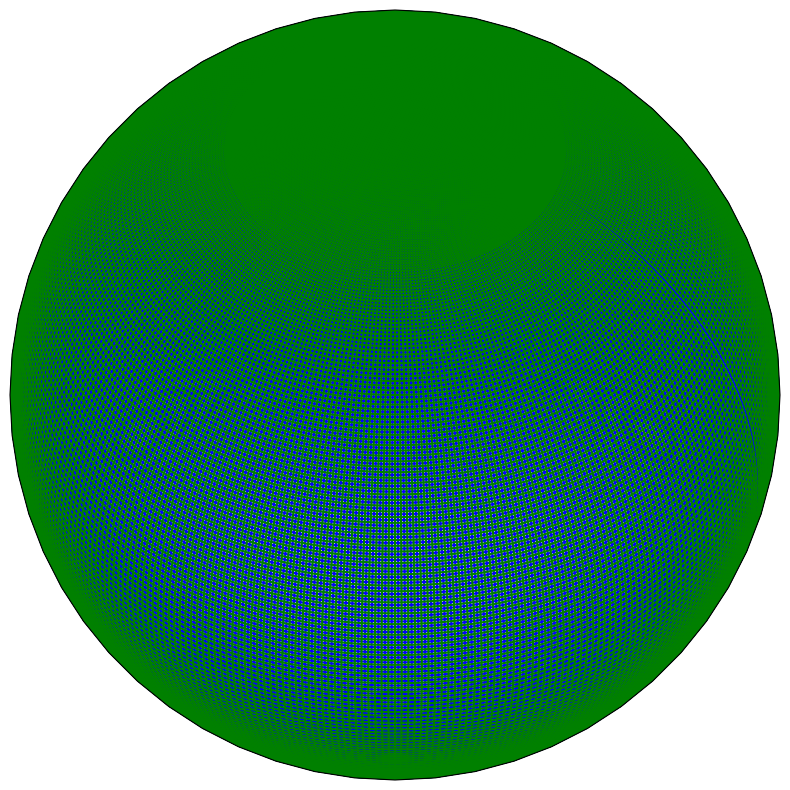

In [22]:
crs = ccrs.Orthographic(-10, 45)

plt.figure(figsize=(10,10))
ax = plt.axes(projection=crs)

ax.set_global()
# ax.gridlines()
# ax.coastlines()

_ = plt.plot(mom_grid.x, mom_grid.y, transform=ccrs.PlateCarree(), color='lightgrey')
_ = plt.plot(mom_grid.x.transpose(), mom_grid.y.transpose(), transform=ccrs.PlateCarree(),color='lightgrey')

_ = plt.plot(np.rad2deg(cice_grid.tlon), np.rad2deg(cice_grid.tlat), transform=ccrs.PlateCarree(), c='b')
_ = plt.plot(np.rad2deg(cice_grid.tlon).transpose(), np.rad2deg(cice_grid.tlat).transpose(), transform=ccrs.PlateCarree(), c='b')

_ = plt.plot(np.rad2deg(cice_grid.ulon), np.rad2deg(cice_grid.ulat), transform=ccrs.PlateCarree(), c='g')
_ = plt.plot(np.rad2deg(cice_grid.ulon).transpose(), np.rad2deg(cice_grid.ulat).transpose(), transform=ccrs.PlateCarree(), c='g')

Make a test cice grid in different way:

In [23]:
test_grid = xr.Dataset()

In [24]:
test_grid['ulat']=np.deg2rad(mom_grid.y.isel(nxp=slice(2,None,2), nyp=slice(2,None,2)))

In [25]:
test_grid['ulon']=np.deg2rad(mom_grid.x.isel(nxp=slice(2,None,2), nyp=slice(2,None,2)))

In [26]:
test_grid['tlat']=np.deg2rad(mom_grid.y.isel(nxp=slice(1,None,2), nyp=slice(1,None,2)))

In [27]:
test_grid['tlon']=np.deg2rad(mom_grid.x.isel(nxp=slice(1,None,2), nyp=slice(1,None,2)))

In [28]:
test_grid['tarea']=mom_grid.area.coarsen(ny=2).sum().coarsen(nx=2).sum()

In [29]:
test_grid['htn']=(mom_grid.dx.isel(nyp=slice(2,None,2)).coarsen(nx=2).sum()*100)

In [30]:
test_grid['hte']=mom_grid.dy.isel(nxp=slice(2,None,2)).coarsen(ny=2).sum()*100

In [31]:
test_grid['angle']=np.deg2rad(mom_grid.angle_dx.isel(nyp=slice(2,None,2), nxp=slice(2,None,2)))

In [32]:
test_grid['angleT']=np.deg2rad(mom_grid.angle_dx.isel(nyp=slice(1,None,2), nxp=slice(1,None,2)))

In [33]:
area_wrapped = mom_grid.area

In [34]:
area_wrapped = xr.concat([
    mom_grid.area.isel(nx=slice(1,None)),
    mom_grid.area.isel(nx=0)
], dim='nx')

In [35]:
top_row = xr.concat([
    mom_grid.area.isel(ny=-1, nx=slice(-2,0,-1)),
    mom_grid.area.isel(ny=-1, nx=[-1,0])
], dim='nx')

In [36]:
area_folded = xr.concat([
    area_wrapped.isel(ny=slice(1,None)),
    top_row
], dim='ny')

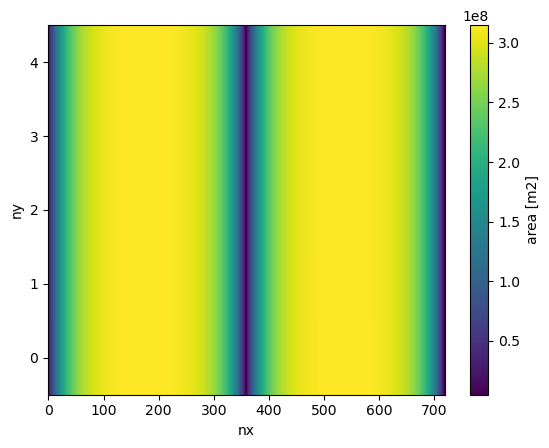

In [37]:
area_folded.sel(ny=slice(-5,None)).plot()

In [38]:
test_grid['uarea'] = area_folded.coarsen(ny=2).sum().coarsen(nx=2).sum()

cice vars not in test?
{'crs'}
missing test vars in cice?
set()
angle allclose: False
angle anom min: nan, anom max: nan


/jobfs/111964008.gadi-pbs/ipykernel_1203618/3656030357.py:31: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar()


htn allclose: True
htn anom min: 0.0, anom max: 0.0
tarea allclose: True
tarea anom min: -1.9073486328125e-06, anom max: 9.5367431640625e-07
ulat allclose: True
ulat anom min: 0.0, anom max: 0.0
angleT allclose: True
angleT anom min: 0.0, anom max: 0.0
ulon allclose: True
ulon anom min: 0.0, anom max: 0.0
hte allclose: True
hte anom min: 0.0, anom max: 0.0
tlon allclose: True
tlon anom min: 0.0, anom max: 0.0
tlat allclose: True
tlat anom min: 0.0, anom max: 0.0
uarea allclose: True
uarea anom min: -6.127357482910156e-05, anom max: 6.127357482910156e-05


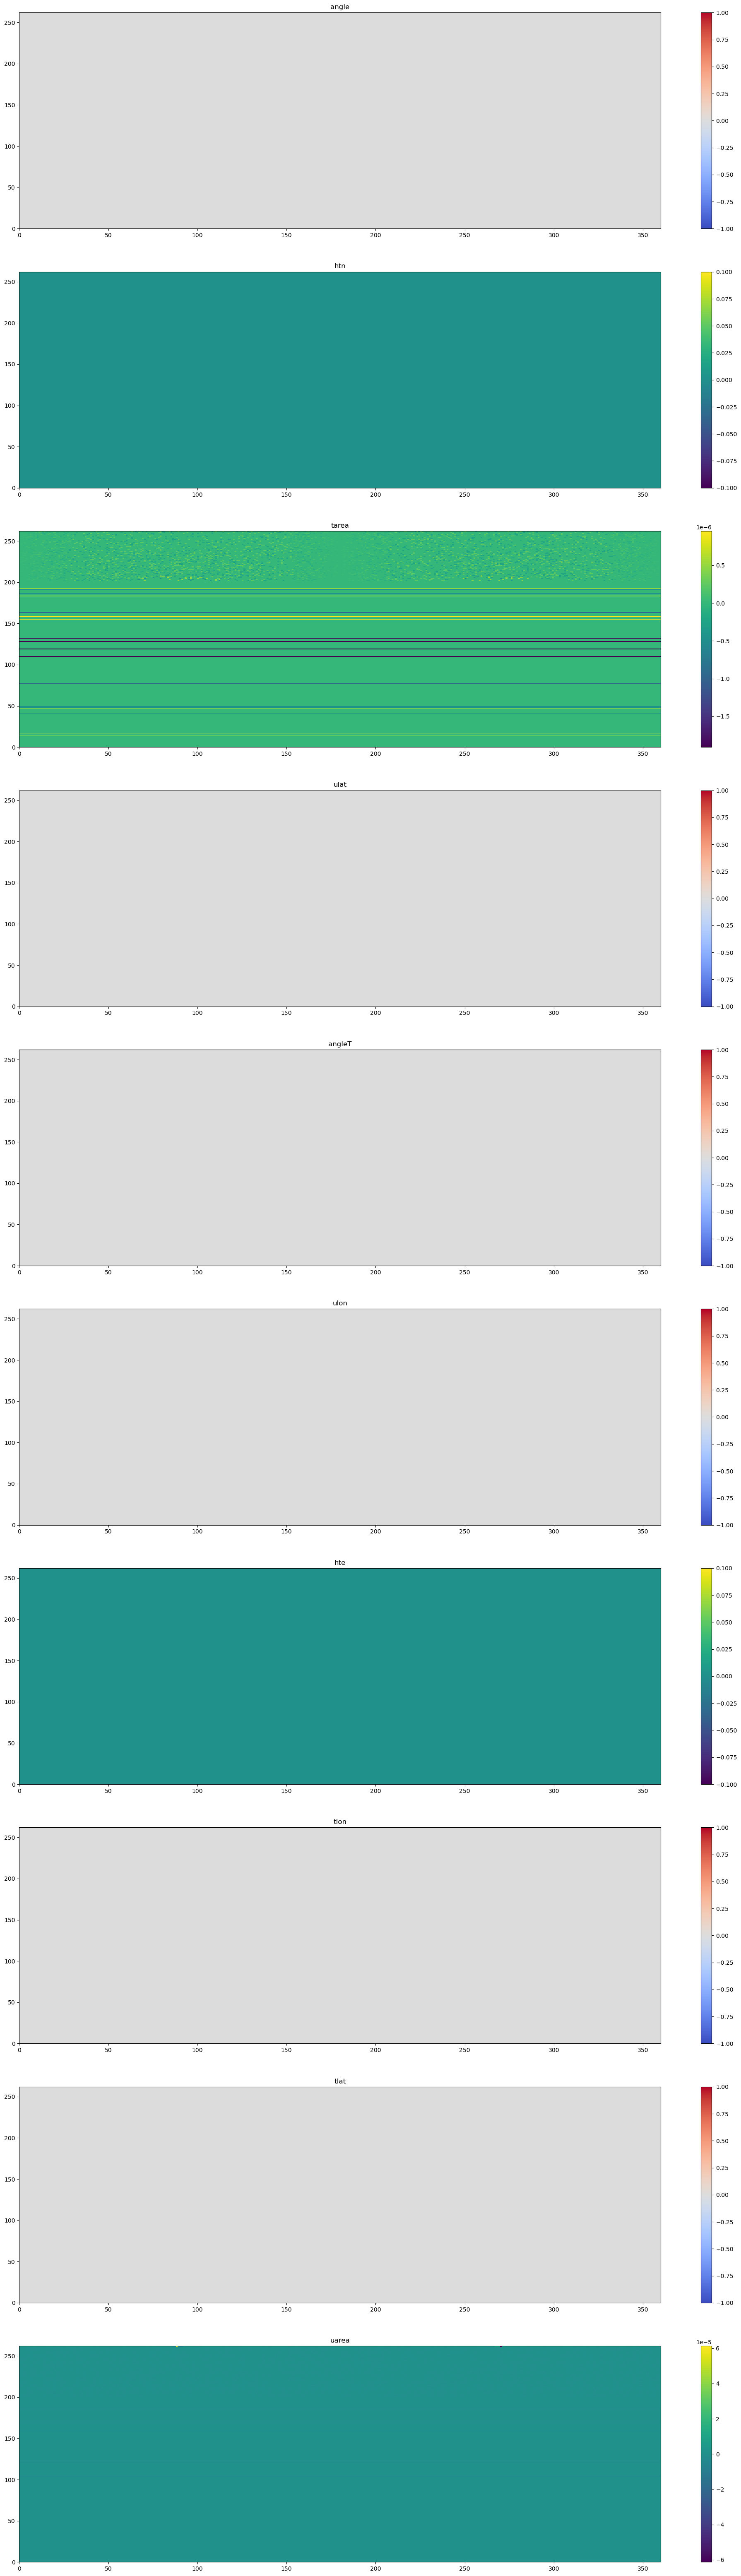

In [39]:
plt.figure(figsize=(25,80))



print("cice vars not in test?")
print(set(cice_grid.variables).difference(test_grid.variables))
print("missing test vars in cice?")
print(set(test_grid.variables).difference(cice_grid.variables))

for j,jVar in enumerate(set(cice_grid.variables).intersection(test_grid.variables)):
    
    plt.subplot(
        len(test_grid.variables),
        1,
        j+1
    )

    print(f'{jVar} allclose: {np.allclose(cice_grid[jVar],test_grid[jVar],rtol=1e-13)}')
            
    anom = (cice_grid[jVar].values-test_grid[jVar].values)

    print(f'{jVar} anom min: {anom.min()}, anom max: {anom.max()}')

    
    if (jVar in (['ulat','ulon','tlat','tlon', 'angle', 'angleT'])):
        anom = np.rad2deg(anom)        
        plt.pcolor(anom,vmin=-1, vmax=1, cmap='coolwarm')
    else:
        plt.pcolor(anom)

    plt.colorbar()
    plt.title(jVar)